<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
# Código

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

df_20211 = pd.read_table('Archivos/SB11_20211.txt',sep="¬")
df_20201 = pd.read_table('Archivos/SB11_20201.txt',sep="¬")
df_20191 = pd.read_table('Archivos/SB11_20191.txt',sep="¬")
df_20181 = pd.read_table('Archivos/SB11_20181.txt',sep="¬")
df_20171 = pd.read_table('Archivos/SB11_20171.txt',sep="¬")

In [2]:

df = pd.concat([df_20211, df_20201,df_20191,df_20181,df_20171])

df.index = range(df.shape[0])

data = df.loc[:, ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', \
                  'PERIODO', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',\
                  'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',\
                  'FAMI_NUMLIBROS', 'ESTU_HORASSEMANATRABAJA','PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', \
                  'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES',\
                  'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_INGLES', 'PUNT_GLOBAL',\
                  'PERCENTIL_GLOBAL']]

data = data.dropna()

data.columns =['TIPO_ID', 'NACIONALIDAD', 'GENERO', 'NACIMIENTO', 'PERIODO', 'DEPARTAMENTO', 'MUNICIPIO',\
               'ESTRATO', 'EDUCACION_PADRE', 'EDUCACION_MADRE', 'TIENE_INTERNET', 'TIENE_PC', 'LIBROS',\
               'TRABAJA', 'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_MATEMATICAS',\
               'PERCENTIL_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',\
               'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_INGLES', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL']

data['TRABAJA_1'] = np.where(data['TRABAJA']=='0', '0', '1')
data['TRABAJA']=data['TRABAJA_1']
data = data.drop(['TRABAJA_1'], axis=1)

data['TIPO_ID'] = data['TIPO_ID'].astype('category')
data['NACIONALIDAD'] = data['NACIONALIDAD'].astype('category')
data['ESTRATO'] = data['ESTRATO'].astype('category')
data['GENERO'] = data['GENERO'].astype('category')
data['EDUCACION_PADRE'] = data['EDUCACION_PADRE'].astype('category')
data['EDUCACION_MADRE'] = data['EDUCACION_MADRE'].astype('category')
data['TIENE_INTERNET'] = data['TIENE_INTERNET'].astype('category')
data['TIENE_PC'] = data['TIENE_PC'].astype('category')
data['TRABAJA'] = data['TRABAJA'].astype('category')
data['PERCENTIL_GLOBAL'] = data['PERCENTIL_GLOBAL'].astype('float')

periodos = data['PERIODO'].unique().tolist()
generos = data['GENERO'].unique().tolist()

freq_periodos = pd.DataFrame(data['PERIODO'].value_counts()) 

freq_GENERO = pd.DataFrame(data['GENERO'].value_counts())

freq_ESTRATO = pd.DataFrame(data['ESTRATO'].value_counts()) 

freq_NACIONALIDAD = pd.DataFrame(data['NACIONALIDAD'].value_counts()) 


In [3]:
print ("La cantidad de examenes a estudiar y analizar son ",len(data),"y se analizaran con ",len(data.columns)-1, " variables")
print ("")
print ("La cantidad de periodos a estudiar y analizar son ",len(periodos), " y son los siguientes con la siguiente cantidad de datos: ")
print ("")
print (freq_periodos)
print ("")
print ("Estos datos ya se encuentran depurados de valores nulos en las variables de interes, estos fueron eliminados ya que no representaban mas del 10% de la información disponible")
print ("")
print ("Un ejemplo de las distribuciones de las variables representativas es el siguiente:")
print ("")
print (freq_GENERO)
print ("")
print (freq_ESTRATO)
print ("")
print (freq_NACIONALIDAD)

La cantidad de examenes a estudiar y analizar son  70087 y se analizaran con  24  variables

La cantidad de periodos a estudiar y analizar son  5  y son los siguientes con la siguiente cantidad de datos: 

       PERIODO
20191    18697
20211    14176
20201    13187
20171    12173
20181    11854

Estos datos ya se encuentran depurados de valores nulos en las variables de interes, estos fueron eliminados ya que no representaban mas del 10% de la información disponible

Un ejemplo de las distribuciones de las variables representativas es el siguiente:

   GENERO
F   35322
M   34765

             ESTRATO
Estrato 3      16949
Estrato 4      14489
Estrato 5      12662
Estrato 6      11880
Estrato 2       9855
Estrato 1       3527
Sin Estrato      725

                        NACIONALIDAD
COLOMBIA                       69536
VENEZUELA                        177
ESTADOS UNIDOS                   102
ESPAÑA                            64
ECUADOR                           29
ARGENTINA             

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


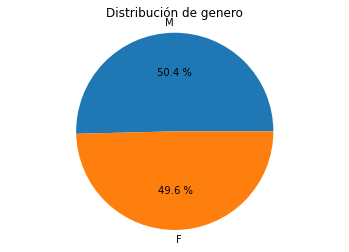

In [5]:
##Grafica Genero

x_genero = data['GENERO'].unique().tolist()
y_genero = data['GENERO'].value_counts().tolist()

plt.pie(y_genero, labels= x_genero, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Distribución de genero")
plt.show()

Podemos ver que la distribución de genero esta equilibrada para los dos tipos

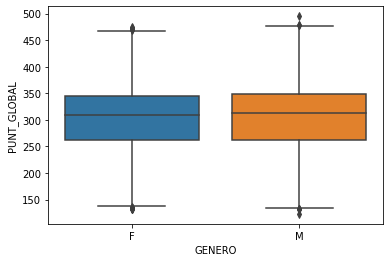

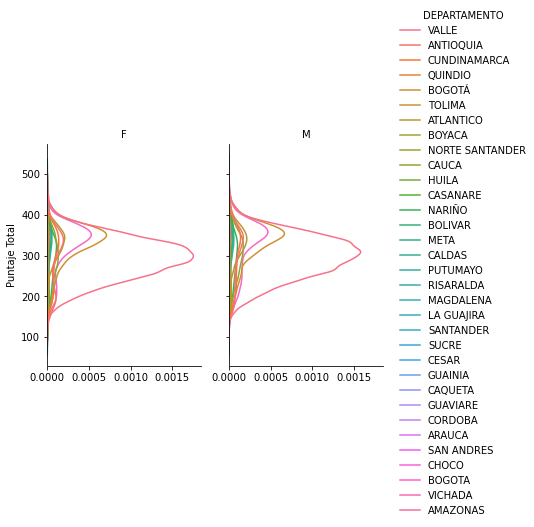

In [6]:
## Box Plot Puntajes vs Genero

gen_box = sns.boxplot(x="GENERO", y="PUNT_GLOBAL", data=data)

### Distribucion genero/Departamento

g = sns.displot(
    data=data, y="PUNT_GLOBAL", hue="DEPARTAMENTO", col="GENERO",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("", "Puntaje Total")
g.set_titles("{col_name}")

Continuando con el genero también podemos ver que aunque el puntaje total medio es un poco mas alto para los hombres, gurdan la misma distribución, dicha distribución se mantiene también comparando entre departamentos y genero.

<AxesSubplot:xlabel='DEPARTAMENTO', ylabel='PUNT_GLOBAL'>

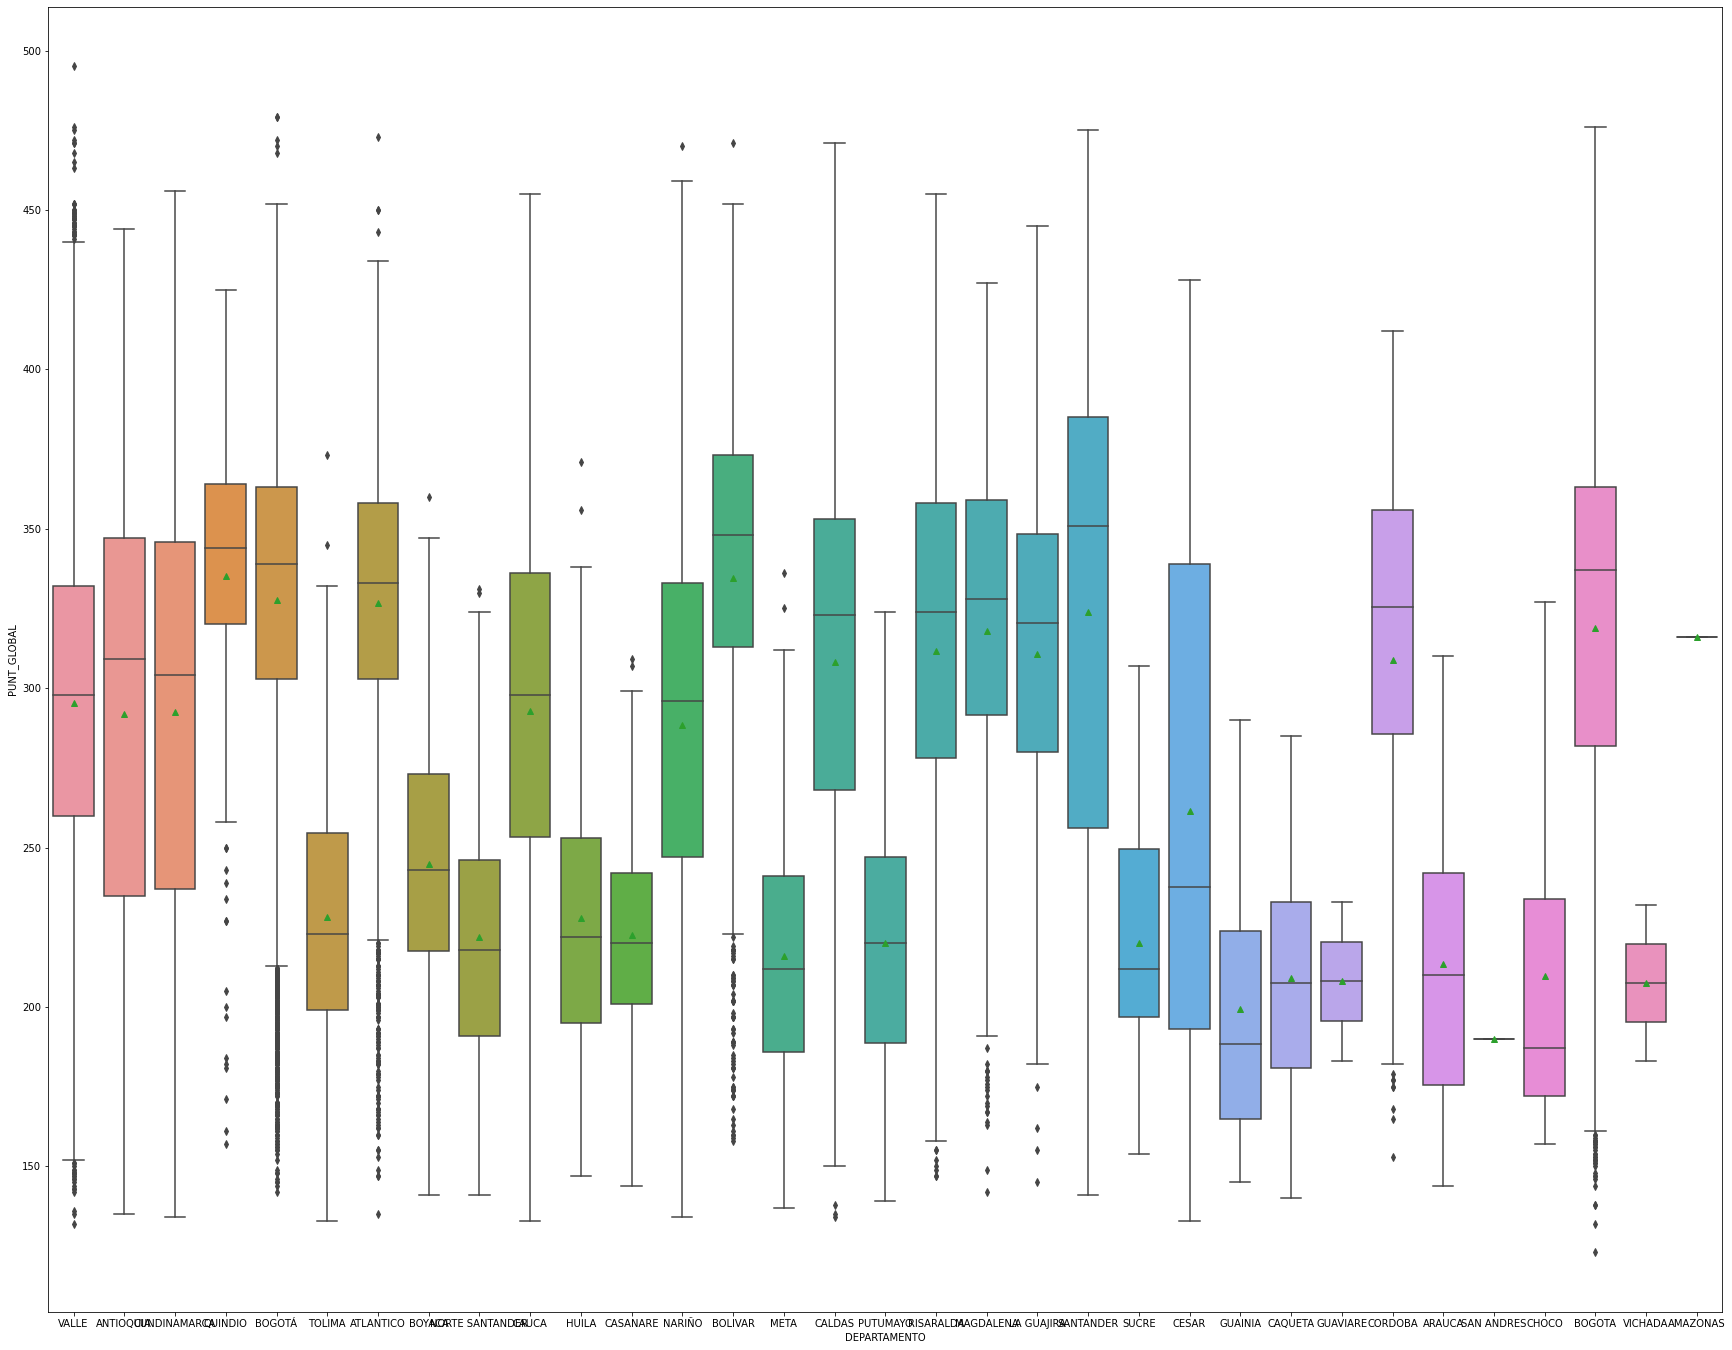

In [7]:
## Box Plot Puntajes vs Departamento
plt.figure(figsize=(30, 24))
sns.boxplot(x="DEPARTAMENTO", y="PUNT_GLOBAL", data=data,showmeans=True)

De esta grafica podemos ver que hay departamentos cuya media de puntuación total esta por debajo de la media de los demas, ejemplo de esto Chocó,Tolima y Guania.

<AxesSubplot:xlabel='TIENE_INTERNET', ylabel='PUNT_GLOBAL'>

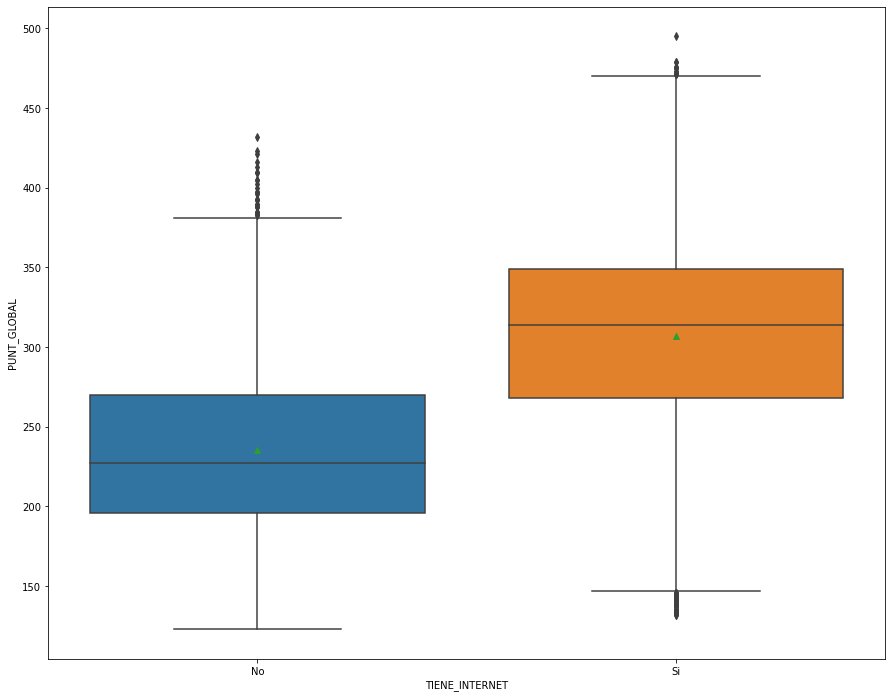

In [8]:
## Box Plot Puntajes vs INTERNET 

plt.figure(figsize=(15, 12))
sns.boxplot(x="TIENE_INTERNET", y="PUNT_GLOBAL", data=data,showmeans=True)

Para este caso vemos una relación directa y proporcional entre los resultados de los estudiantes que no tienen internet y los que si lo tienen.

<AxesSubplot:xlabel='LIBROS', ylabel='PUNT_LECTURA_CRITICA'>

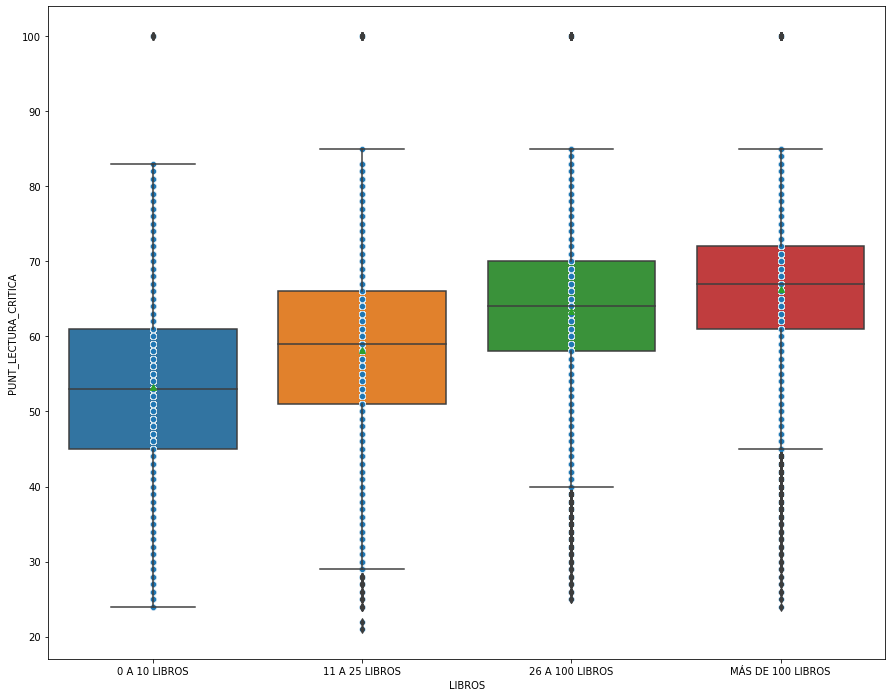

In [9]:
## Box Plot Puntajes vs INTERNET 

plt.figure(figsize=(15, 12))
sns.boxplot(x="LIBROS", y="PUNT_LECTURA_CRITICA", data=data,showmeans=True)
sns.scatterplot(data=data, x="LIBROS", y="PUNT_LECTURA_CRITICA")

Encontramos tambien de manera peculiar, que la cantidad de libros en el hogar si influye de manera significativa en el resultado de la prueba de lectura critica.

<AxesSubplot:xlabel='ESTRATO', ylabel='PUNT_GLOBAL'>

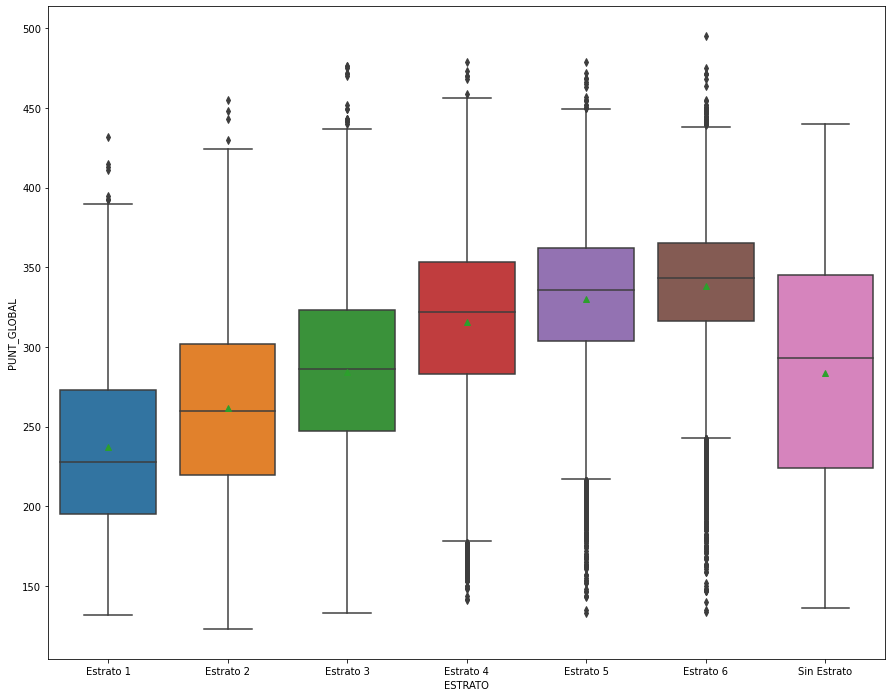

In [10]:
## Box Plot Puntajes vs Estrato 

plt.figure(figsize=(15, 12))
sns.boxplot(x="ESTRATO", y="PUNT_GLOBAL", data=data,showmeans=True)

Por ultimo una de las variables mas realcionadas con los puntajes de las pruebas es la variable de estrato, la cual como podemos ver tiene un efecto significativo en los resultados finales.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

X = data[['NACIONALIDAD', 'GENERO', 'DEPARTAMENTO', 'MUNICIPIO',\
               'ESTRATO', 'EDUCACION_PADRE', 'EDUCACION_MADRE', 'TIENE_INTERNET', 'TIENE_PC', 'LIBROS',\
               'TRABAJA']]
y = data['PUNT_GLOBAL']

X = pd.get_dummies(X)

X = X[['GENERO_M','DEPARTAMENTO_TOLIMA','DEPARTAMENTO_GUAINIA','MUNICIPIO_BOGOTÁ D.C.','ESTRATO_Estrato 3','ESTRATO_Estrato 1','ESTRATO_Estrato 6','TIENE_INTERNET_Si','TRABAJA_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)

modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1514.
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:37:59   Log-Likelihood:            -1.8677e+05
No. Observations:               35043   AIC:                         3.736e+05
Df Residuals:                   35033   BIC:                         3.736e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   269.85

Se decide ejecutar un modelo regresión lineal múltiple con las variables Dummy generadas por las muchas variables categóricas que contiene la base de datos, después de esto y con el análisis previo que se realizo de las variables, se depuraron los estimadores según dos factores (Relevancia en el contexto del modelo, Significancia Estadística), se llega al modelo anteriormente mostrado el cual tiene significancia global demostrada por su estadístico F, significancia en todas sus variables demostrada por los p-value, y un R2 del 28%.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [32]:
import ipywidgets as widgets
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

barra_deslizante = widgets.IntSlider(min = 1, max = 99, step = 1)

seleccion = widgets.Output()

def funcion_a_correr_tras_cambio(info_control): 
    # Reestablecemos la variable seleccion.
    seleccion.clear_output()
    # Cuando seleccion toma un nuevo valor.
    with seleccion:
        # Mostramos un mensaje con el valor del control.
        print("El percentil limite es "+ str(info_control['new']))
        conditionlist = [
            (data['PERCENTIL_GLOBAL'] >= info_control['new']),data['PERCENTIL_GLOBAL'] < info_control['new']]
        choicelist = [1,0]
        data['RIESGO'] = np.select(conditionlist, choicelist, default='Not Specified')

        X = data[['NACIONALIDAD', 'GENERO', 'DEPARTAMENTO', 'MUNICIPIO',\
                       'ESTRATO', 'EDUCACION_PADRE', 'EDUCACION_MADRE', 'TIENE_INTERNET', 'TIENE_PC', 'LIBROS',\
                       'TRABAJA']]
        y = data['RIESGO']

        X = pd.get_dummies(X)

        X = X[['GENERO_M','DEPARTAMENTO_TOLIMA','DEPARTAMENTO_GUAINIA','MUNICIPIO_BOGOTÁ D.C.','ESTRATO_Estrato 3','ESTRATO_Estrato 1','ESTRATO_Estrato 6','TIENE_INTERNET_Si','TRABAJA_1']]

        model = linear_model.LogisticRegression()
        model.fit(X,y)
        predictions = model.predict(X)


        predictores = list(zip(X.columns, model.coef_.flatten(), ))

        print("El logaritmo de los odds de estar en condición de riesgo varia en ",predictores[0][1],"cuando se es hombre.")
        print("El logaritmo de los odds de estar en condición de riesgo varia en ",predictores[1][1],"cuando se reside en el departamento del Tolima.")
        print("El logaritmo de los odds de estar en condición de riesgo varia en ",predictores[4][1],"cuando se reside en Estrato 3.")
        print("El logaritmo de los odds de estar en condición de riesgo varia en ",predictores[-1][1],"cuando se trabaja.")
        print("El logaritmo de los odds de estar en condición de riesgo varia en ",predictores[-2][1],"cuando se tiene internet.")

        print("")
        print("La precisión del modelo es de: ",model.score(X,y))
        print("")
        print("La matriz de confusión es la siguiente:")
        print(confusion_matrix(y, predictions))


        
barra_deslizante.observe(funcion_a_correr_tras_cambio, names='value')     

display(barra_deslizante)

display(seleccion)


IntSlider(value=1, max=99, min=1)

Output()